# Visualization

## Qubit Visualization

What are the possible states a qubit can be in and how can we build up a visual cue to help us make sense of quantum states and their evolution?

We know our qubit can have two distinct states: $\ket{0}$ and $\ket{1}$. If these were the only two states, we could represent them as two vectors on a one-dimensional line (i.e., the z-axis in the image below). We also know that qubits can be in an equal superposition of states: $\ket{+}$ and $\ket{-}$. In order to capture all of the states in equal superposition, we will need a 2D plane (i.e., the $xy$-plane in the image below). If you dive deeper you will learn about the existence of other states that will call for a 3D extension. 

In general, a quantum state can be written in the form $\ket{\psi} = \cos(\frac{\theta}{2})\ket{0}+e^{i\varphi}\sin(\frac{\theta}{2})\ket{1}$ where $\theta$ is a real number between $0$ and $\pi$ and $\varphi$ is a real value between $0$ and $2\pi$.  For example, the minus state, $\ket{-} = \frac{1}{\sqrt{2}}\ket{0}- \frac{1}{\sqrt{2}}\ket{1}$, can be rewritten as
$$\ket{-}  = \cos(\frac{\theta}{2})\ket{0}+e^{i\varphi}\sin(\frac{\theta}{2})\ket{1}\text{ with }\theta = \frac{\pi}{2}\text{ and }\varphi = \pi.$$ 
This can be visualized in the image below as a unit vector pointing in the direction of the negative $x$-axis.

Using spherical coordinates, it is possible to depict all the possible states of a single qubit on a sphere. This is called a Bloch sphere. 

<img src="images/Bloch_sphere.png" alt="Bloch Sphere" width="300" height="300">


Let us try to showcase the functionality to render such a 3D representation with CUDA-Q. 
First, let us define a single-qubit kernel that returns a different state each time. This kernel uses random rotations.

Note: CUDA-Q uses the [QuTiP](https://qutip.org) library to render Bloch spheres. The following code will throw an error if QuTiP is not installed. 

In [1]:
# install `qutip` in the current Python kernel. Skip this if `qutip` is already installed.
# `matplotlib` is required for all visualization tasks.
# Make sure to restart your kernel if you execute this!
# In a Jupyter notebook, go to the menu bar > Kernel > Restart Kernel.
# In VSCode, click on the Restart button in the Jupyter toolbar.

# The '\' before the '>' operator is so that the shell does not misunderstand
# the '>' qualifier for the bash pipe operation.

import sys

try:
    import matplotlib.pyplot as plt
    import qutip

except ImportError:
    print("Tools not found, installing. Please restart your kernel after this is done.")
    !{sys.executable} -m pip install qutip\>=5 matplotlib\>=3.5
    print("\nNew libraries have been installed. Please restart your kernel!")


Tools not found, installing. Please restart your kernel after this is done.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/28.0 MB ? eta -:--:--

     ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.5/28.0 MB 7.2 MB/s eta 0:00:04

     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.9/28.0 MB 8.3 MB/s eta 0:00:04

     ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/28.0 MB 9.3 MB/s eta 0:00:03

     ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/28.0 MB 11.4 MB/s eta 0:00:03

     ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/28.0 MB 12.8 MB/s eta 0:00:02

     ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/28.0 MB 14.1 MB/s eta 0:00:02

     ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/28.0 MB 15.6 MB/s eta 0:00:02

     ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/28.0 MB 19.6 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/28.0 MB 22.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 14.0/28.0 MB 44.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 16.8/28.0 MB 57.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 23.0/28.0 MB 84.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 27.4/28.0 MB 101.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 28.0/28.0 MB 105.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 48.9 MB/s eta 0:00:00



New libraries have been installed. Please restart your kernel!


In [2]:
import cudaq
import numpy as np

## Retry the subsequent cells by setting the target to density matrix simulator.
# cudaq.set_target("density-matrix-cpu")


@cudaq.kernel
def kernel(angles: np.ndarray):
    qubit = cudaq.qubit()
    rz(angles[0], qubit)
    rx(angles[1], qubit)
    rz(angles[2], qubit)


Next, we instantiate a random number generator, so we can get random outputs. We then create 4 random single-qubit states by using `cudaq.add_to_bloch_sphere()` on the output state obtained from the random kernel.

In [3]:
rng = np.random.default_rng(seed=11)
blochSphereList = []
for _ in range(4):
    angleList = rng.random(3) * 2 * np.pi
    sph = cudaq.add_to_bloch_sphere(cudaq.get_state(kernel, angleList))
    blochSphereList.append(sph)


We can display the spheres with `cudaq.show()`. Show the first sphere:

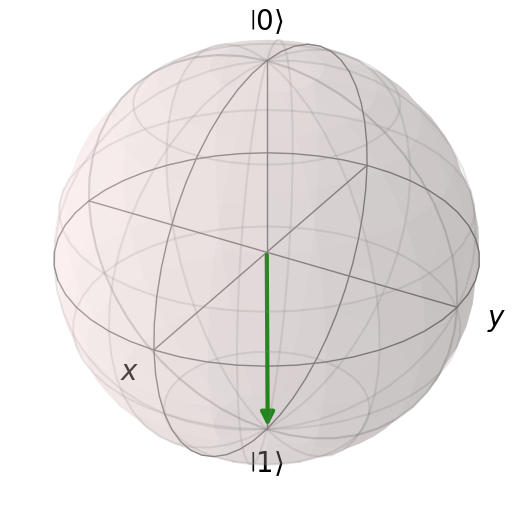

In [4]:
cudaq.show(blochSphereList[0])

We can also show multiple Bloch spheres side by side - simply set the `nrows` and `ncols` in the call to `cudaq.show()` accordingly. Make sure to have more spaces than spheres in your list, else it will throw an error! Let us show two spheres in a row:

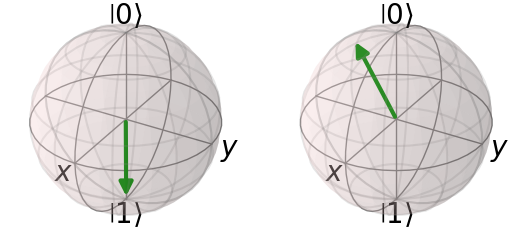

In [5]:
cudaq.show(blochSphereList[:2], nrows=1, ncols=2)

We can show them in a column too, if we want! Simply set the `nrows = 2` and `ncols = 1`.

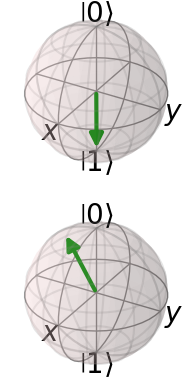

In [6]:
cudaq.show(blochSphereList[:2], nrows=2, ncols=1)

Can we show the entire list of 4 Bloch spheres we created? Absolutely!

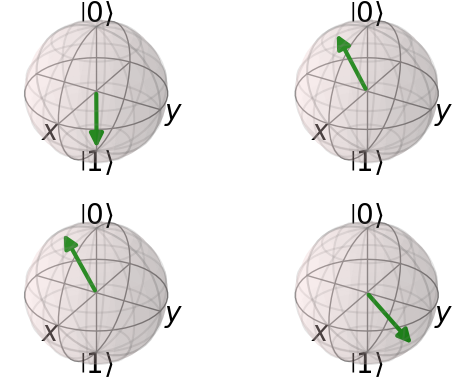

In [7]:
cudaq.show(blochSphereList[:], nrows=2, ncols=2)

What if we had to add multiple vectors to a single Bloch sphere? CUDA-Q uses the [QuTiP](https://www.qutip.org) toolbox to construct Bloch spheres. We can then add multiple states to the same Bloch sphere by passing the sphere object as an argument to `cudaq.add_to_bloch_sphere()`.

In [8]:
import qutip

rng = np.random.default_rng(seed=47)
blochSphere = qutip.Bloch()
for _ in range(10):
    angleList = rng.random(3) * 2 * np.pi
    sph = cudaq.add_to_bloch_sphere(cudaq.get_state(kernel, angleList), blochSphere)


This created a single Bloch sphere with 10 random vectors. Let us see how it looks.

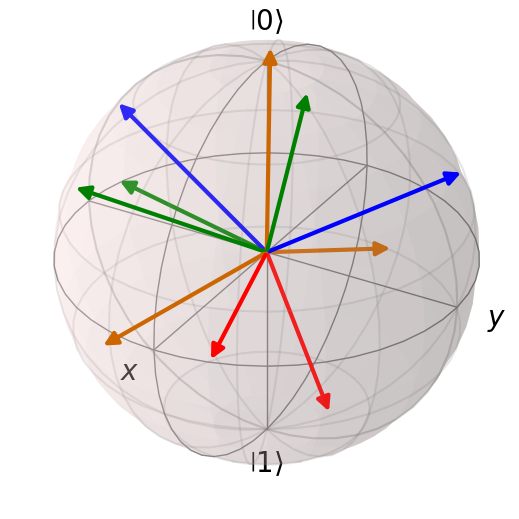

In [9]:
blochSphere.show()

Unfortunately, there is no such handy visualization for multi-qubit states. In particular, a multi-qubit state cannot be visualized as multiple Bloch spheres due to the nature of entanglement that makes quantum computing so powerful. 

## Kernel Visualization

A CUDA-Q kernel can be visualized using the `cudaq.draw` API which returns a string representing the drawing of the execution path, in the specified format. ASCII (default) and LaTeX formats are supported.

In [10]:
@cudaq.kernel
def kernel_to_draw():
    q = cudaq.qvector(4)
    h(q)
    x.ctrl(q[0], q[1])
    y.ctrl([q[0], q[1]], q[2])
    z(q[2])
    
    swap(q[0], q[1])
    swap(q[0], q[3])
    swap(q[1], q[2])

    r1(3.14159, q[0])
    tdg(q[1])
    s(q[2])

In [11]:
print(cudaq.draw(kernel_to_draw))

     ╭───╮                  ╭───────────╮       
q0 : ┤ h ├──●────●────╳───╳─┤ r1(3.142) ├───────
     ├───┤╭─┴─╮  │    │   │ ╰───────────╯╭─────╮
q1 : ┤ h ├┤ x ├──●────╳───┼───────╳──────┤ tdg ├
     ├───┤╰───╯╭─┴─╮╭───╮ │       │      ╰┬───┬╯
q2 : ┤ h ├─────┤ y ├┤ z ├─┼───────╳───────┤ s ├─
     ├───┤     ╰───╯╰───╯ │               ╰───╯ 
q3 : ┤ h ├────────────────╳─────────────────────
     ╰───╯                                      



In [12]:
print(cudaq.draw('latex', kernel_to_draw))

\documentclass{minimal}
\usepackage{quantikz}
\begin{document}
\begin{quantikz}
  \lstick{$q_0$} & \gate{H} & \ctrl{1} & \ctrl{2} & \swap{1} & \swap{3} & \gate{R_1(3.142)} & \qw & \qw \\
  \lstick{$q_1$} & \gate{H} & \gate{X} & \ctrl{1} & \targX{} & \qw & \swap{1} & \gate{T^\dag} & \qw \\
  \lstick{$q_2$} & \gate{H} & \qw & \gate{Y} & \gate{Z} & \qw & \targX{} & \gate{S} & \qw \\
  \lstick{$q_3$} & \gate{H} & \qw & \qw & \qw & \targX{} & \qw & \qw & \qw \\
\end{quantikz}
\end{document}



Copy this output string into any LaTeX editor and export it to PDF.

<img src="images/circuit_pdf.png" alt="Circuit in PDF format" width="500" height="250">